#Análisis Exploratorio

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar dataset
df = pd.read_excel("Telco_customer_churn.xlsx")

# Limpiar nombres de columnas
df.columns = df.columns.str.strip()

# Crear columna de abandono
df['Churn'] = df['Churn Value']

# Total de clientes
print("Total de clientes:", df.shape[0])


Total de clientes: 7043



Distribución de abandono:
Churn
0    5174
1    1869
Name: count, dtype: int64


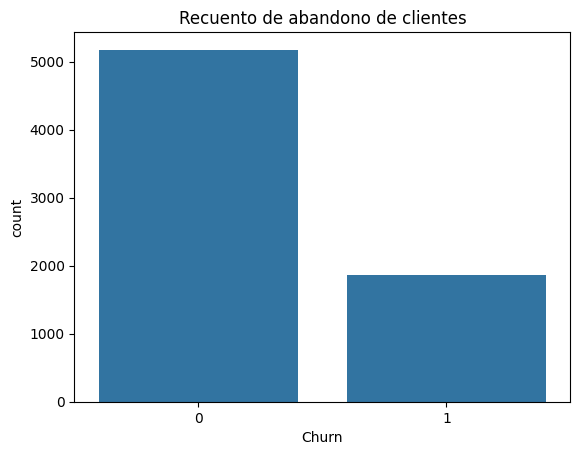

In [4]:
# Distribución de abandono
print("\nDistribución de abandono:")
print(df['Churn'].value_counts())

sns.countplot(x='Churn', data=df)
plt.title('Recuento de abandono de clientes')
plt.show()

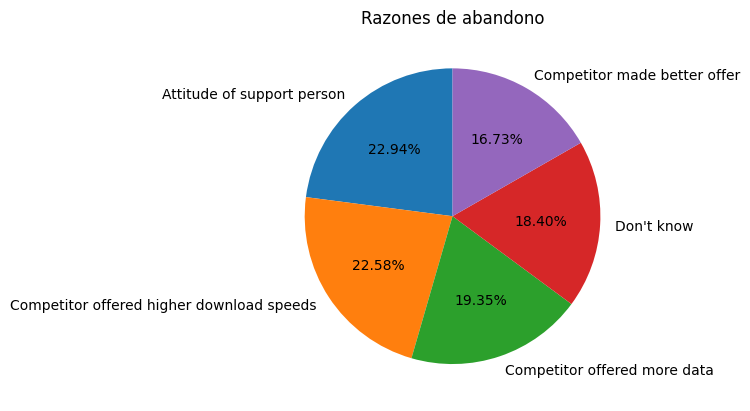

In [10]:
value = df['Churn Reason'].value_counts().head(5)
labels = value.index

plt.pie(value, labels=labels, autopct='%1.2f%%', startangle=90)
plt.title("Razones de abandono")
plt.show()



Porcentaje de abandono: 26.54 %

Duración media del contrato por rotación:
Churn
0    37.569965
1    17.979133
Name: Tenure Months, dtype: float64


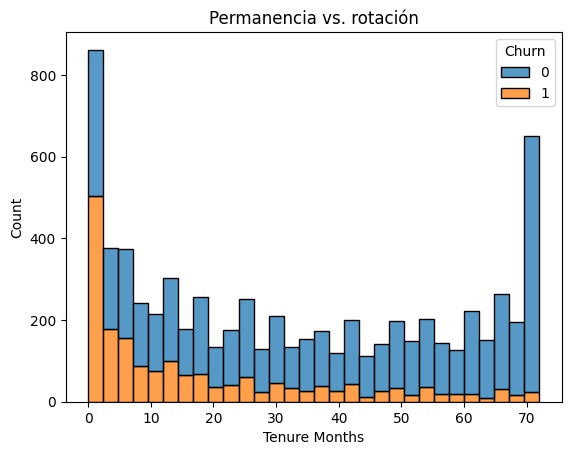

In [5]:
# Porcentaje de abandono (1 = Yes)
churn_counts = df['Churn'].value_counts()
churn_percentage = (churn_counts[1] / df.shape[0]) * 100
print("\nPorcentaje de abandono:", round(churn_percentage, 2), "%")

# Duración media del contrato por rotación
tenure_churn = df.groupby('Churn')['Tenure Months'].mean()
print("\nDuración media del contrato por rotación:")
print(tenure_churn)


sns.histplot(data=df, x='Tenure Months', hue='Churn', bins=30, multiple='stack')
plt.title('Permanencia vs. rotación')
plt.show()


Cargos mensuales promedio por abandono:
Churn
0    61.265124
1    74.441332
Name: Monthly Charges, dtype: float64


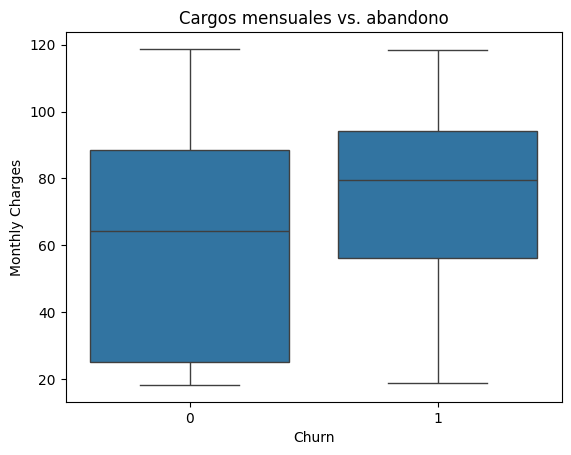

In [7]:
# Cargos mensuales promedio
monthly_charges_churn = df.groupby('Churn')['Monthly Charges'].mean()
print("\nCargos mensuales promedio por abandono:")
print(monthly_charges_churn)

sns.boxplot(x='Churn', y='Monthly Charges', data=df)
plt.title('Cargos mensuales vs. abandono')
plt.show()


Contrato vs. abandono:
Churn              0     1
Contract                  
Month-to-month  2220  1655
One year        1307   166
Two year        1647    48


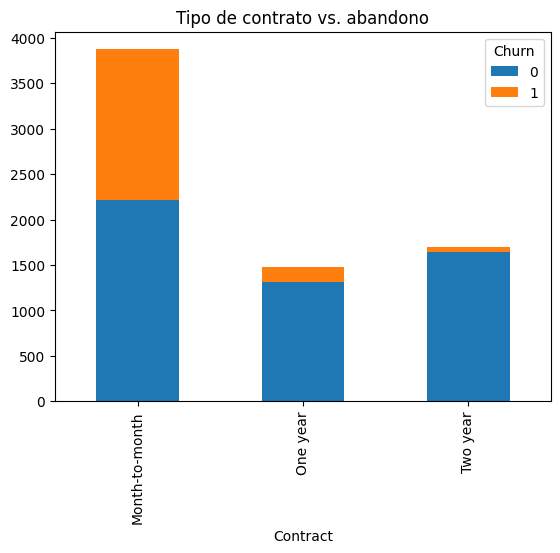

In [6]:
# Contrato vs. abandono
contract_churn = df.groupby(['Contract', 'Churn']).size().unstack()
print("\nContrato vs. abandono:")
print(contract_churn)

contract_churn.plot(kind='bar', stacked=True)
plt.title('Tipo de contrato vs. abandono')
plt.show()